# Bespoke retrieval based on CLIP embedding vectors

In [6]:
from superduperdb.client import the_client

docs = the_client.coco.documents

In the notebook from the previous chapter we implemented retrieval based on a pretrained CLIP model from open-source. In this notebook we will train our own model based on a simpler architecture, but which has the upside of increased efficiency compared to the original model.

To this end we will first implement a simpler sentence embedding, using a simple word-embedding approach based around Glove. Please look at the model in `examples.models.AverageOfGloves`.

Get the embeddings first if you haven't already:

In [10]:
!curl https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip -o data/glove.6B.zip
!unzip data/glove.6B.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  822M  100  822M    0     0  5275k      0  0:02:39  0:02:39 --:--:-- 5128k  5679k      0  0:02:28  0:00:36  0:01:52 5225k 5655k      0  0:02:28  0:00:38  0:01:50 5226k      0  0:02:29  0:00:39  0:01:50 5233k80k      0  0:02:30  0:00:46  0:01:44 5220k 5466k      0  0:02:34  0:01:07  0:01:27 5208k40k      0  0:02:34  0:01:15  0:01:19 5225k6k      0  0:02:36  0:01:40  0:00:56 5120k  0  5304k      0  0:02:38  0:02:14  0:00:24 5120k
Archive:  data/glove.6B.zip
  inflating: glove.6B.50d.txt        
  inflating: glove.6B.100d.txt       
  inflating: glove.6B.200d.txt       
  inflating: glove.6B.300d.txt       


We quote the full code from the `examples` directory here for completeness:

In `examples.models`:

```python
class AverageOfGloves:
    def __init__(self, embeddings, index):
        self.embeddings = embeddings
        self.index = index
        self.lookup = dict(zip(self.index, range(len(self.index))))

    def preprocess(self, sentence):
        if isinstance(sentence, list):
            sentence = ' '.join(sentence)
        cleaned = re.sub('[^a-z0-9 ]', ' ',  sentence.lower())
        cleaned = re.sub('[ ]+', ' ',  cleaned)
        words = cleaned.split()
        words = [x for x in words if x in self.index]
        if not words:
            return torch.ones(50).type(torch.float)
        ix = list(map(self.lookup.__getitem__, words))
        vectors = self.embeddings[ix, :]
        return vectors.mean(0)
```

In [14]:
import numpy
import torch
from examples.models import AverageOfGloves

with open('glove.6B.50d.txt') as f:
    lines = f.read().split('\n')
    
lines = [x.split(' ') for x in lines[:-1]]
index = [x[0] for x in lines]
vectors = [[float(y) for y in x[1:]] for x in lines]
vectors = numpy.array(vectors)

glove = AverageOfGloves(torch.from_numpy(vectors).type(torch.float), index)

docs.create_model(
    'average_glove',
    object=glove,
    key='captions',
    active=False,
)

Since the glove vectors are smaller than the output of the CLIP model, we will create a linear projection of the CLIP embeddings so that the outputs over image inputs have the same size as the glove embeddings.

In [15]:
docs.create_model(
    'clip_projection',
    object=torch.nn.Linear(1024, 50),
    active=True,
    key='img',
    type='float_tensor',
    features={'img': 'clip'},
    verbose=True,
)

computing chunk (1/17)
finding documents under filter
done.
processing with clip_projection


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5000/5000 [00:00<00:00, 15849.46it/s]


bulk writing...
done.
computing chunk (2/17)
finding documents under filter
done.
processing with clip_projection


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5000/5000 [00:00<00:00, 18473.02it/s]


bulk writing...
done.
computing chunk (3/17)
finding documents under filter
done.
processing with clip_projection


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5000/5000 [00:00<00:00, 17227.97it/s]


bulk writing...
done.
computing chunk (4/17)
finding documents under filter
done.
processing with clip_projection


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5000/5000 [00:00<00:00, 15385.28it/s]


bulk writing...
done.
computing chunk (5/17)
finding documents under filter
done.
processing with clip_projection


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5000/5000 [00:00<00:00, 14218.32it/s]


bulk writing...
done.
computing chunk (6/17)
finding documents under filter
done.
processing with clip_projection


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5000/5000 [00:00<00:00, 19713.69it/s]


bulk writing...
done.
computing chunk (7/17)
finding documents under filter
done.
processing with clip_projection


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5000/5000 [00:00<00:00, 19523.08it/s]


bulk writing...
done.
computing chunk (8/17)
finding documents under filter
done.
processing with clip_projection


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5000/5000 [00:00<00:00, 19427.59it/s]


bulk writing...
done.
computing chunk (9/17)
finding documents under filter
done.
processing with clip_projection


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5000/5000 [00:00<00:00, 17623.69it/s]


bulk writing...
done.
computing chunk (10/17)
finding documents under filter
done.
processing with clip_projection


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5000/5000 [00:00<00:00, 17361.48it/s]


bulk writing...
done.
computing chunk (11/17)
finding documents under filter
done.
processing with clip_projection


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5000/5000 [00:00<00:00, 17342.51it/s]


bulk writing...
done.
computing chunk (12/17)
finding documents under filter
done.
processing with clip_projection


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5000/5000 [00:00<00:00, 18930.44it/s]


bulk writing...
done.
computing chunk (13/17)
finding documents under filter
done.
processing with clip_projection


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5000/5000 [00:00<00:00, 19075.30it/s]


bulk writing...
done.
computing chunk (14/17)
finding documents under filter
done.
processing with clip_projection


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5000/5000 [00:00<00:00, 18700.83it/s]


bulk writing...
done.
computing chunk (15/17)
finding documents under filter
done.
processing with clip_projection


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5000/5000 [00:00<00:00, 14474.63it/s]


bulk writing...
done.
computing chunk (16/17)
finding documents under filter
done.
processing with clip_projection


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5000/5000 [00:00<00:00, 18408.83it/s]


bulk writing...
done.
computing chunk (17/17)
finding documents under filter
done.
processing with clip_projection


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1783/1783 [00:00<00:00, 16340.58it/s]


bulk writing...
done.


Let's also create a loss function, in order to be able to perform the learning task. Here's the code in full:

In `examples.losses`:

```python
import torch

def ranking_loss(x, y):
    x = x.div(x.norm(dim=1)[:, None])
    y = y.div(y.norm(dim=1)[:, None])
    similarities = x.matmul(y.T)
    return -torch.nn.functional.log_softmax(similarities, dim=1).diag().mean()
```

In [16]:
from examples.losses import ranking_loss

docs.create_loss('ranking_loss', ranking_loss)

A semantic index training requires:

- 1 or more models
- A measure function to measure similarity between model outputs
- A loss function
- One or more validation sets
- One or more metrics to measure performance

We now have all of these things ready and registered with the database, so we can start the training:

In [7]:
docs.create_semantic_index(
    'simple_image_search',
    models=['clip_projection', 'average_glove'],
    loss='ranking_loss',
    filter={},
    projection={'image': 0, '_like': 0},
    metrics=['p_at_10'],
    measure='css',
    validation_sets=['text2image_retrieval'],
    batch_size=250,
    num_workers=0,
    n_epochs=20,
    lr=0.001,
    log_weights=True,
    download=True,
    validation_interval=50,
    no_improve_then_stop=5,
    n_iterations=5000,
    use_grads={'clip_projection': True, 'average_glove': False},
)

downloading ids for {'_fold': 'train'}


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 77716/77716 [00:00<00:00, 226470.26it/s]


downloading records for {'_fold': 'valid'}


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4067/4067 [00:00<00:00, 6417.83it/s]


computing chunk (1/1)
finding documents under filter
done.
processing with clip_projection


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 15385.34it/s]

bulk writing...


done.


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 59143.84it/s]


loading hashes: "simple_image_search"


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:17<00:00, 56.34it/s]


fold: VALID; iteration: 0; epoch: 0; text2image_retrieval/p_at_10: 0.356; loss: 5.240744029774385; 
fold: TRAIN; iteration: 0; epoch: 0; loss: 5.316588878631592; 
fold: TRAIN; iteration: 1; epoch: 0; loss: 5.3261027336120605; 
fold: TRAIN; iteration: 2; epoch: 0; loss: 5.3142170906066895; 
fold: TRAIN; iteration: 3; epoch: 0; loss: 5.318691253662109; 
fold: TRAIN; iteration: 4; epoch: 0; loss: 5.321549892425537; 
fold: TRAIN; iteration: 5; epoch: 0; loss: 5.317481517791748; 
fold: TRAIN; iteration: 6; epoch: 0; loss: 5.315903186798096; 
fold: TRAIN; iteration: 7; epoch: 0; loss: 5.322670936584473; 
fold: TRAIN; iteration: 8; epoch: 0; loss: 5.313449382781982; 
fold: TRAIN; iteration: 9; epoch: 0; loss: 5.308677673339844; 
fold: TRAIN; iteration: 10; epoch: 0; loss: 5.321168899536133; 
fold: TRAIN; iteration: 11; epoch: 0; loss: 5.319817543029785; 
fold: TRAIN; iteration: 12; epoch: 0; loss: 5.310636043548584; 
fold: TRAIN; iteration: 13; epoch: 0; loss: 5.319171905517578; 
fold: TRAIN;

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 14100.02it/s]

bulk writing...


done.


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 55735.30it/s]


loading hashes: "simple_image_search"


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:16<00:00, 60.10it/s]


no best model found...
fold: VALID; iteration: 50; epoch: 0; text2image_retrieval/p_at_10: 0.349; loss: 5.241150463328642; 
fold: TRAIN; iteration: 50; epoch: 0; loss: 5.3170623779296875; 
fold: TRAIN; iteration: 51; epoch: 0; loss: 5.315185546875; 
fold: TRAIN; iteration: 52; epoch: 0; loss: 5.32337760925293; 
fold: TRAIN; iteration: 53; epoch: 0; loss: 5.320399761199951; 
fold: TRAIN; iteration: 54; epoch: 0; loss: 5.3180084228515625; 
fold: TRAIN; iteration: 55; epoch: 0; loss: 5.320443630218506; 
fold: TRAIN; iteration: 56; epoch: 0; loss: 5.309638500213623; 
aborting training...
computing chunk (1/17)
finding documents under filter
done.
processing with clip_projection


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5000/5000 [00:00<00:00, 16845.00it/s]


bulk writing...
done.
computing chunk (2/17)
finding documents under filter
done.
processing with clip_projection


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5000/5000 [00:00<00:00, 18970.30it/s]


bulk writing...
done.
computing chunk (3/17)
finding documents under filter
done.
processing with clip_projection


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5000/5000 [00:00<00:00, 18737.05it/s]


bulk writing...
done.
computing chunk (4/17)
finding documents under filter
done.
processing with clip_projection


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5000/5000 [00:00<00:00, 10851.47it/s]


bulk writing...
done.
computing chunk (5/17)
finding documents under filter
done.
processing with clip_projection


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5000/5000 [00:00<00:00, 19068.61it/s]


bulk writing...
done.
computing chunk (6/17)
finding documents under filter
done.
processing with clip_projection


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5000/5000 [00:00<00:00, 12997.82it/s]


bulk writing...
done.
computing chunk (7/17)
finding documents under filter
done.
processing with clip_projection


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5000/5000 [00:00<00:00, 18365.88it/s]


bulk writing...
done.
computing chunk (8/17)
finding documents under filter
done.
processing with clip_projection


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5000/5000 [00:00<00:00, 11488.52it/s]


bulk writing...
done.
computing chunk (9/17)
finding documents under filter
done.
processing with clip_projection


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5000/5000 [00:00<00:00, 20034.79it/s]


bulk writing...
done.
computing chunk (10/17)
finding documents under filter
done.
processing with clip_projection


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5000/5000 [00:00<00:00, 14414.82it/s]


bulk writing...
done.
computing chunk (11/17)
finding documents under filter
done.
processing with clip_projection


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5000/5000 [00:00<00:00, 12019.75it/s]


bulk writing...
done.
computing chunk (12/17)
finding documents under filter
done.
processing with clip_projection


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5000/5000 [00:00<00:00, 19780.27it/s]


bulk writing...
done.
computing chunk (13/17)
finding documents under filter
done.
processing with clip_projection


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5000/5000 [00:00<00:00, 10905.39it/s]


bulk writing...
done.
computing chunk (14/17)
finding documents under filter
done.
processing with clip_projection


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5000/5000 [00:00<00:00, 20253.49it/s]


bulk writing...
done.
computing chunk (15/17)
finding documents under filter
done.
processing with clip_projection


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5000/5000 [00:00<00:00, 11924.41it/s]


bulk writing...
done.
computing chunk (16/17)
finding documents under filter
done.
processing with clip_projection


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5000/5000 [00:00<00:00, 11519.36it/s]


bulk writing...
done.
computing chunk (17/17)
finding documents under filter
done.
processing with clip_projection


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1783/1783 [00:00<00:00, 17801.54it/s]


bulk writing...
done.


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 60216.27it/s]


loading hashes: "simple_image_search"


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:15<00:00, 66.51it/s]


We now can see that we've set and trained our own semantic index. Let's take a look at the results of the training:

In [8]:
from matplotlib import pyplot as plt
info = docs['_semantic_indexes'].find_one({'name': 'simple_image_search'})

We can visualize the improvement of metrics during training using standard functionality from the scientific Python ecosystem. No need for Tensorboards or special visualization interfaces!

[5.240744029774385, 5.241150463328642]


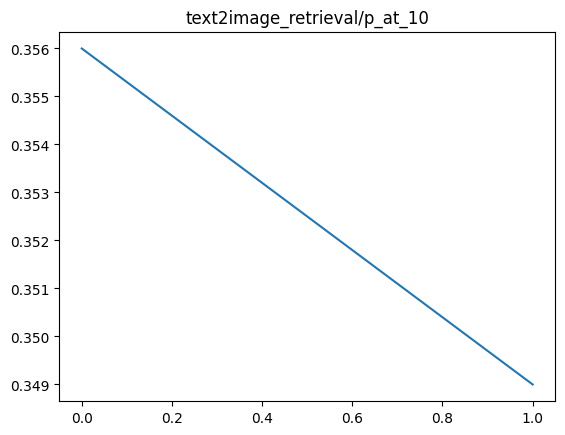

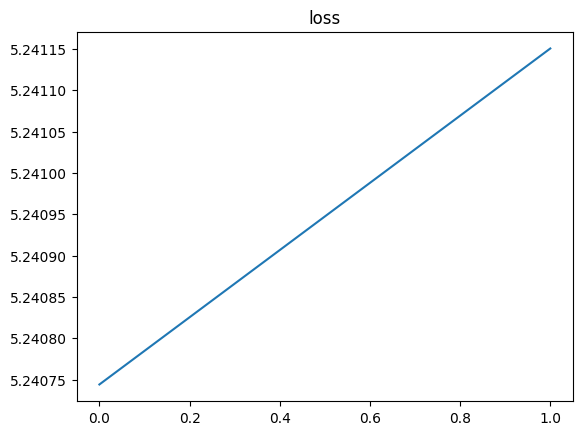

In [9]:
for k in info['metric_values']:
    if k == 'loss':
        print(info['metric_values'][k])
        plt.figure()
        plt.title('loss')
        plt.plot(info['metric_values'][k])
        continue
    for result in info['metric_values'][k]:
        plt.figure()
        plt.title(f'{k}/{result}')
        plt.plot(info['metric_values'][k][result])
plt.show()

The same can be done for the progression of weights during training:

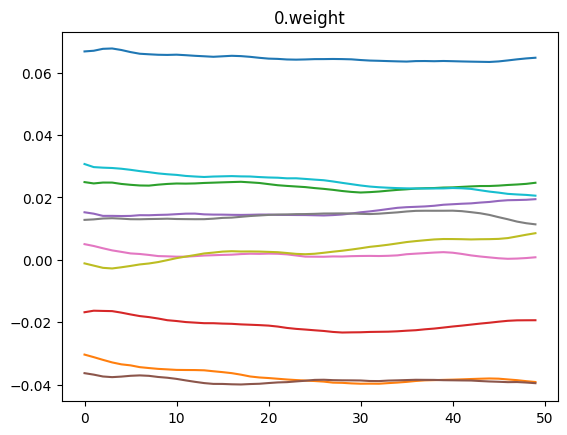

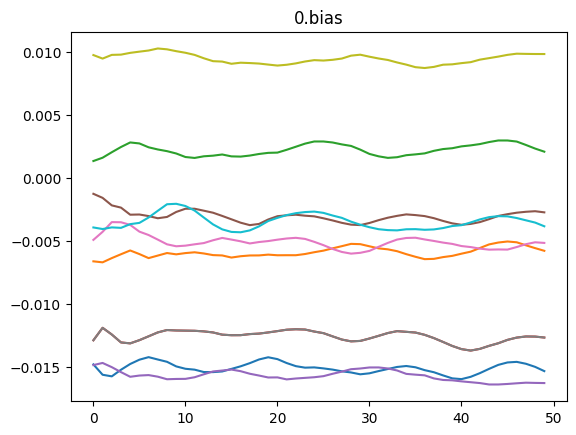

In [10]:
for parameter in info['weights']:
    plt.figure()
    plt.title(parameter)
    plt.plot(info['weights'][parameter])

We see that our model provides quick retrievals using its simpler architecture, and we succeeded in doing this with a very small resource footprint:

  0%|                                                                                                                                                                 | 0/81783 [00:00<?, ?it/s]

loading hashes: "simple_image_search"


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 81783/81783 [00:01<00:00, 60240.68it/s]


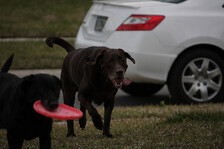

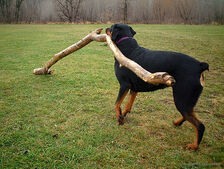

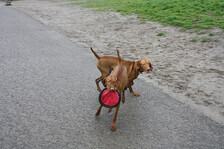

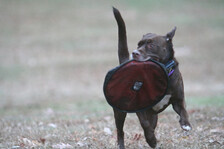

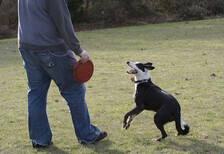

In [12]:
from IPython.display import display

docs.semantic_index = 'simple_image_search'
for r in docs.find(like={'captions': ['Dog catches frisbee']}, n=5):
    display(r['img'])

Let's see how well our model has done:

In [14]:
docs.validate_semantic_index('simple_image_search', ['text2image_retrieval'], ['p_at_10'])
docs['_semantic_indexes'].find_one({'name': 'simple_image_search'}, {'final_metrics': 1})

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 27014.54it/s]


loading hashes: "simple_image_search"


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:15<00:00, 65.81it/s]


{'_id': ObjectId('63f5655f64f2eea2884cf55b'),
 'final_metrics': {'text2image_retrieval': {'p_at_10': 0.349}}}